<a href="https://colab.research.google.com/github/bonardolubis/MachineLearningTasks/blob/main/TaskWeek4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Minggu ke-4

Nama : Bonardo Lubis

NPM : 2006568784

# Install d2l

In [ ]:
!pip install d2l

# 8. Modern Convolutional Neural Networks

## 8.1. Deep Convolutional Neural Networks (AlexNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.1.1. Representation Learning

#### 8.1.1.1. Missing Ingredient: Data

#### 8.1.1.2. Missing Ingredient: Hardware

### 8.1.2. Alex Net

#### 8.1.2.1. Architecture

#### 8.1.2.2. Activation Functions

#### 8.1.2.3. Capacity Control and Preprocessing

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3. Training

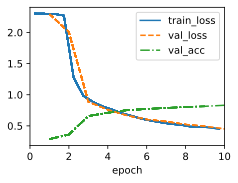

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

### 8.1.4. Discussion

### 8.1.5. Exercises

1. Following up on the discussion above, analyze the computational properties of AlexNet.

1.1.   Compute the memory footprint for convolutions and fully connected layers,
respectively. Which one dominates?

Answer :

Untuk menghitung jejak memori (memory footprint), kita perlu mengalikan jumlah parameter di setiap lapisan dengan ukuran data yang dihasilkan:

Convolutional Layers:

Layer 1:
(
11
×
11
×
3
×
96
)
(11×11×3×96) filter + bias

Layer 2:
(
5
×
5
×
96
×
256
)
(5×5×96×256)

Layer 3-5:
(
3
×
3
×
384
×
384
)
,
(
3
×
3
×
384
×
256
)
(3×3×384×384),(3×3×384×256)

Fully Connected Layers:

FC6:
4096
×
6400
4096×6400

FC7:
4096
×
4096
4096×4096

FC8:
4096
×
1000
4096×1000

Dominasi memori: Fully connected layers memerlukan lebih banyak memori dibandingkan convolutional layers karena ukuran matriks yang besar pada layer FC.

1.2.   Calculate the computational cost for the convolutions and the fully connected layers.

Answer :

Convolutional Layers: Untuk convolution, biaya komputasi adalah
𝐻
×
𝑊
×
𝐶
×
𝐾
×
𝐾
×
𝑀
, di mana:

𝐻
,
𝑊
adalah tinggi dan lebar output feature map,

𝐶
adalah saluran input,

𝐾
adalah ukuran kernel,

𝑀
adalah jumlah filter.

Fully Connected Layers: Biaya komputasi dari layer fully connected adalah
𝑖
𝑛
𝑝
𝑢
𝑡
×
𝑜
𝑢
𝑡
𝑝
𝑢
𝑡
.

Dominasi komputasi: Fully connected layers membutuhkan lebih banyak komputasi, terutama karena ukuran matriks yang sangat besar di layer FC.

1.3.    How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?

Answer :

* Training: Membutuhkan lebih banyak bandwidth karena harus membaca input, melakukan forward pass, menyimpan gradien, dan melakukan backward pass untuk update parameter.
* Inference: Bandwidth lebih rendah karena hanya melakukan forward pass saja. Latency mungkin menjadi lebih penting untuk inferensi real-time.

2. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?

Answer :     

Optimalisasi tergantung pada skenario penggunaan. Beberapa pendekatan yang dapat digunakan:

* Menggunakan batching: Memproses batch gambar secara bersamaan mengurangi overhead memori.
* Desain chip dengan arsitektur yang memprioritaskan throughput: Seperti GPU yang menggunakan banyak core lebih lambat untuk menangani operasi paralel.
* Menggunakan memori hierarki yang lebih besar: Misalnya, menambah cache lebih besar untuk mengurangi akses ke memori utama.

3. Why do engineers no longer report performance benchmarks on AlexNet?

Answer :

AlexNet dianggap sudah ketinggalan zaman dan telah digantikan oleh arsitektur yang lebih efisien dan kuat seperti VGG, ResNet, dan EfficientNet yang lebih sesuai untuk tugas-tugas modern dengan ukuran model yang lebih kecil dan performa yang lebih baik.

4. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why

Answer :    

Jika jumlah epochs ditingkatkan, AlexNet akan menunjukkan hasil yang lebih baik dibandingkan LeNet karena kapasitas model yang lebih besar memungkinkan untuk mempelajari lebih banyak fitur. LeNet kemungkinan besar akan mencapai batas kinerja lebih cepat karena arsitekturnya lebih sederhana.

5. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.

5.1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.

Answer :     

* Mengurangi jumlah filter pada convolutional layers.
* Mengurangi ukuran fully connected layers.
* Menggunakan batch normalization atau dropout untuk mencegah overfitting.

5.2. Design a better model that works directly on 28 x 28
images.

Answer :

In [ ]:
import torch
from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))  # Output: [batch_size, 32, 28, 28]
        x = self.pool(x)  # Output: [batch_size, 32, 14, 14]
        x = self.relu(self.conv2(x))  # Output: [batch_size, 64, 14, 14]
        x = self.pool(x)  # Output: [batch_size, 64, 7, 7]
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = self.relu(self.fc1(x))  # Output: [batch_size, 128]
        x = self.dropout(x)
        x = self.fc2(x)  # Output: [batch_size, num_classes]
        return x

# Contoh penggunaan model
model = SimpleCNN(num_classes=10)

6. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.

Answer :    

* Batch size besar: Throughput meningkat karena GPU dapat memproses lebih banyak gambar sekaligus, namun penggunaan memori GPU juga meningkat.
* Batch size kecil: Throughput menurun, tetapi akurasi dapat meningkat pada batch yang lebih kecil karena update lebih sering dilakukan, meskipun memori GPU lebih hemat.

7. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?

Answer :    

Ya, menambahkan Dropout dan ReLU ke LeNet-5 dapat meningkatkan performa dengan mencegah overfitting dan mempercepat pelatihan.

8. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?

Answer :    

Ya, AlexNet dapat dibuat overfit dengan menghapus dropout atau mengurangi augmentasi data, serta melatih lebih lama pada dataset kecil seperti Fashion-MNIST.

## 8.2. Networks Using Blocks (VGG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.2.1. VGG Blocks

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

### 8.2.2. VGG Network

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


### 8.2.3. Training

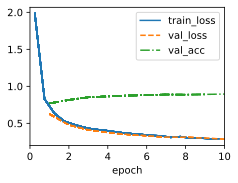

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.2.4. Summary

### 8.2.5. Exercises

1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.

1.1. Compare the number of parameters needed for AlexNet and VGG.

Answer :    

* AlexNet memiliki sekitar 60 juta parameter.
* VGG-16 memiliki sekitar 138 juta parameter.

Untuk menghitung jumlah parameter di antara kedua jaringan ini, Anda dapat menghitungnya dengan menambahkan parameter pada setiap lapisan konvolusi dan lapisan fully connected. Secara umum, VGG menggunakan lebih banyak lapisan konvolusi, sehingga jumlah parameternya jauh lebih besar daripada AlexNet. Oleh karena itu, VGG membutuhkan lebih banyak memori GPU daripada AlexNet.

1.2. Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.

Answer :    

Untuk memperkirakan floating point operations (FLOPs), hitung operasi dalam setiap lapisan konvolusi dan fully connected. Umumnya, operasi pada lapisan konvolusi lebih berat dibandingkan dengan operasi pada lapisan fully connected karena terdapat lebih banyak perhitungan elemen-matriks.

* AlexNet memiliki 5 lapisan konvolusi dan 3 lapisan fully connected.
* VGG-16 memiliki 13 lapisan konvolusi dan 3 lapisan fully connected.

VGG membutuhkan lebih banyak FLOPs di lapisan konvolusinya, yang membuatnya lebih lambat secara komputasi.

1.3. How could you reduce the computational cost created by the fully connected layers?

Answer :    

Untuk mengurangi biaya komputasi dari lapisan fully connected, Anda bisa:
* Menggunakan Global Average Pooling alih-alih lapisan fully connected.
* Mengurangi jumlah neuron di lapisan fully connected.
* Menggunakan teknik dimensionality reduction seperti Principal Component Analysis (PCA) sebelum memasukkan input ke lapisan fully connected.
* Menggunakan dropout yang lebih agresif untuk mengurangi ukuran jaringan.


2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?

Answer :     

Tiga lapisan yang tidak terlihat dalam output bentuk dimensi jaringan berasal dari lapisan fully connected di akhir jaringan. Dalam desain VGG, setelah beberapa blok konvolusi, jaringan di-flatten (lapisan fully connected pertama), kemudian ada dua lapisan fully connected tambahan setelah itu. Inilah yang menjelaskan mengapa hanya delapan lapisan konvolusi yang terlihat, tetapi jaringan ini disebut VGG-11.

3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.

Jawab :    

Anda dapat menggunakan argumen yang sama dalam implementasi untuk membuat VGG-16 dan VGG-19 dengan mengubah jumlah lapisan konvolusi. Misalnya:

* VGG-16: Arch (1, 64), (1, 128), (2, 256), (2, 512), (2, 512)
* VGG-19: Arch (2, 64), (2, 128), (4, 256), (4, 512), (4, 512)

Struktur ini akan mematuhi desain VGG yang ditentukan dalam paper Simonyan dan Zisserman.

4. Upsampling the resolution in Fashion-MNIST eight-fold from 28 x 28
 to 224 x 224
 dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.

 Answer :    

Upsampling resolusi di Fashion-MNIST delapan kali lipat dari 28 x 28 ke 224 x 224 sangat boros. Cobalah memodifikasi arsitektur jaringan dan konversi resolusi.

Untuk mengurangi pemborosan ini, Anda bisa mencoba menggunakan input dengan resolusi lebih rendah, seperti 56 x 56 atau 84 x 84, daripada menggunakannya langsung ke resolusi 224 x 224. Cara lain untuk menjaga akurasi adalah dengan menambahkan lapisan nonlinearitas tambahan sebelum melakukan downsampling, sehingga meskipun resolusi input lebih rendah, jaringan tetap dapat menangkap fitur yang lebih kompleks. Anda juga bisa menggunakan techniques seperti dilated convolutions untuk menangkap informasi dari skala yang lebih besar tanpa memerlukan peningkatan resolusi yang besar.



## 8.3. Network in Network (NiN)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.3.1. NiN Blocks

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

### 8.3.2. NiN Model

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 8.3.3. Training

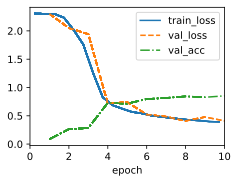

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.3.4. Summary

### 8.3.5. Exercises

1. Why are there two 1 x 1
 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?

 Answer :    

* Dua layer konvolusi 1x1 digunakan untuk meningkatkan non-linearitas antara saluran (channels) pada setiap lokasi spatial. Konvolusi 1x1 memungkinkan jaringan untuk belajar relasi yang lebih kompleks antar channels.
* Jika ditingkatkan menjadi tiga, model mungkin akan meningkatkan kapasitas untuk menangkap hubungan yang lebih kompleks antar channels, namun dapat memperlambat pelatihan dan meningkatkan jumlah parameter. Kemungkinan efek lain adalah overfitting karena kompleksitas yang lebih tinggi.
* Jika dikurangi menjadi satu, ini akan mengurangi kompleksitas model dan mempercepat pelatihan, tetapi mungkin juga mengurangi kemampuan jaringan untuk menangkap variasi yang lebih kompleks antar channels, yang bisa mengurangi akurasi.

2. What changes if you replace the 1 x 1
 convolutions by 3 x 3
 convolutions?

 Answer :     

Mengganti konvolusi 1x1 dengan konvolusi 3x3 akan meningkatkan jumlah parameter secara signifikan karena konvolusi 3x3 melibatkan lebih banyak operasi. Ini juga dapat menangkap lebih banyak informasi spatial karena jangkauan receptive field yang lebih luas, tetapi di sisi lain dapat meningkatkan penggunaan memori dan waktu komputasi. Selain itu, konvolusi 3x3 mungkin tidak seefisien konvolusi 1x1 dalam memanipulasi informasi antar channels.

3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?

Answer :     

* Kecepatan: Layer fully connected membutuhkan lebih banyak komputasi dibandingkan dengan global average pooling karena layer ini memerlukan banyak operasi matrix multiplication. Ini akan memperlambat pelatihan dan prediksi.
* Akurasi: Akurasi bisa saja meningkat dalam beberapa kasus karena fully connected layer memiliki kemampuan lebih besar dalam menangkap variasi dan pola yang kompleks. Namun, pada kasus lain, penghapusan pooling mungkin akan menyebabkan overfitting.
* Jumlah parameter: Layer fully connected secara signifikan meningkatkan jumlah parameter dibandingkan global average pooling, yang hanya menghitung rata-rata tanpa melibatkan bobot tambahan.


4. Calculate the resource usage for NiN.

4.1. What is the number of parameters?

Answer :    

Jumlah parameter dapat dihitung berdasarkan dimensi kernel konvolusi dan jumlah filter yang diterapkan. Setiap konvolusi memiliki formula (jumlah filter * dimensi kernel + bias) dan jumlah parameter di layer fully connected (jika digunakan) dihitung berdasarkan ukuran input dan output.

4.2. What is the amount of computation?

Answer :    

Jumlah operasi floating point (FLOPs) dihitung berdasarkan konvolusi, pooling, dan operasi matrix multiplication pada setiap layer.

4.3. What is the amount of memory needed during training?

Answer :    

Selama pelatihan, Anda harus mempertimbangkan memori yang dibutuhkan untuk menyimpan bobot, input, output, dan gradien untuk setiap layer. Ini meliputi ukuran tensor yang dihasilkan pada setiap layer selama forward dan backward pass.

4.4. What is the amount of memory needed during prediction?

Answer :    

Memori selama prediksi biasanya lebih kecil karena hanya perlu menyimpan bobot dan output (tanpa gradien).

5. What are possible problems with reducing the 384 x 5 x 5
 representation to a 10 x 5 x 5
 representation in one step?

 Answer :     

 Mengurangi dimensi secara drastis dari 384 ke 10 dalam satu langkah bisa menyebabkan hilangnya informasi yang terlalu banyak, mengurangi kemampuan model untuk menangkap fitur yang penting. Ini juga dapat mengakibatkan jaringan menjadi kurang stabil dan menyebabkan penurunan akurasi karena transformasi yang terlalu agresif pada fitur.

6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

Answer :    

Dalam VGG, keputusan utama adalah menambah kedalaman jaringan dengan memperkenalkan lebih banyak layer konvolusi. Untuk jaringan NiN-like, Anda dapat mengikuti pendekatan ini dengan menambah lebih banyak NiN blocks (setara dengan memperbanyak jumlah konvolusi 1x1) sambil mempertahankan penggunaan global average pooling di akhir. Misalnya, versi NiN-11, NiN-16, dan NiN-19 dapat dibangun dengan cara yang mirip, tetapi menggunakan blok NiN dengan lebih banyak lapisan konvolusi di setiap tahap untuk meningkatkan kapasitas jaringan.

## 8.4 Multi-Branch Networks (GoogLeNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.4.1. Inception Blocks

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

### 8.4.2. GoogLeNet Model

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


### 8.4.3. Training

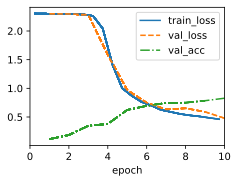

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.4.4. Discussion

### 8.4.5. Exercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:

1.1. Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.

Answer :    

Batch normalization layer digunakan untuk menormalkan output dari layer sebelumnya dengan tujuan mempercepat konvergensi selama training. Anda bisa menambahkan batch normalization setelah setiap convolutional layer dalam Inception block.

1.2. Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).

Answer :    

Anda dapat mencoba mengubah jumlah channel output pada setiap branch dari Inception block atau mengganti urutan operasi, misalnya memindahkan max pooling sebelum convolution di branch keempat.

1.3. Use label smoothing for model regularization, as described in Szegedy et al. (2016).

Answer :       

Label smoothing adalah teknik regularisasi yang membantu model menjadi lebih tahan terhadap overfitting. Label smoothing mengubah target label menjadi distribusi probabilitas dengan nilai sedikit lebih kecil daripada 1 atau 0 (misalnya, target 1 menjadi 0.9 dan target 0 menjadi 0.1).

1.4. Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.

Answer :     

Menambahkan residual connection memungkinkan model untuk mengalirkan informasi langsung dari satu layer ke layer lainnya tanpa transformasi non-linear, yang membantu menghindari masalah vanishing gradients.

2. What is the minimum image size needed for GoogLeNet to work?

Answer :     

GoogLeNet pada dasarnya dirancang untuk input gambar dengan resolusi 224x224 piksel. Namun, dalam implementasi pada subbab ini, input telah dikurangi menjadi 96x96 piksel untuk mempercepat pelatihan. Dengan modifikasi lebih lanjut, mungkin Anda bisa menggunakan ukuran yang lebih kecil, namun resolusi terlalu rendah mungkin akan mempengaruhi akurasi model.

3. Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of 28 x 28
 pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?

 Answer :    

Agar GoogLeNet bisa bekerja pada resolusi 28x28, Anda perlu menyesuaikan ukuran convolutions dan pooling. Misalnya, stem bisa dimulai dengan convolutions yang lebih kecil dan pooling yang lebih agresif untuk memperkecil ukuran spatial dengan cepat. Setelah itu, Anda bisa menggunakan Inception blocks dengan convolutions yang sesuai agar tetap menangkap berbagai ukuran fitur. Anda juga mungkin perlu mengurangi jumlah channel pada setiap layer untuk menyesuaikan ukuran dataset yang lebih kecil seperti Fashion-MNIST.

4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?

Answer :    

AlexNet dan VGG memiliki jumlah parameter yang sangat besar karena mereka menggunakan fully connected layers yang besar setelah convolutional layers. Sebaliknya, NiN (Network in Network) dan GoogLeNet mengurangi jumlah parameter dengan mengganti fully connected layers dengan global average pooling. GoogLeNet juga mengurangi jumlah parameter dengan menggunakan Inception blocks yang menggabungkan convolutions dengan ukuran kernel yang berbeda, serta convolutions 1x1 untuk mengurangi dimensionalitas.

5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?

Answer :     

GoogLeNet menggunakan lebih sedikit parameter dibandingkan dengan AlexNet karena arsitekturnya yang lebih efisien (Inception block). Namun, karena GoogLeNet menggunakan multi-branch convolutions, jumlah operasi komputasi per forward pass bisa menjadi lebih besar daripada AlexNet. Hal ini mempengaruhi desain chip akselerator, yang mungkin membutuhkan memori yang lebih kecil tetapi bandwidth yang lebih tinggi untuk mengatasi operasi paralel pada multiple branches. Cache size juga harus dioptimalkan untuk memaksimalkan efisiensi pemrosesan, dan specialized operations seperti convolutions mungkin perlu dioptimalkan dalam hardware untuk mempercepat inference dan training.

## 8.5. Batch Normalization

### 8.5.1. Training Deep Networks

### 8.5.2. Batch Normalization Layers

#### 8.5.2.1. Fully Connected Layers

#### 8.5.2.2. Convolutional Layers

#### 8.5.2.3. Layer Normalization

#### 8.5.2.4. Batch Normalization During Prediction

### 8.5.3. Implementation from Scratch

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

### 8.5.4. LeNet with Batch Normalization

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

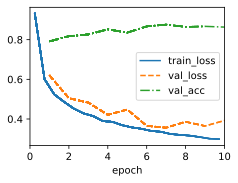

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.8679, 2.3085, 1.8015, 1.9091, 1.5657, 1.9467], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([ 0.3130,  1.1849, -1.1253, -1.2851,  1.1538,  0.8318], device='cuda:0',
        grad_fn=<ViewBackward0>))

### 8.5.5. Concise Implementation

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

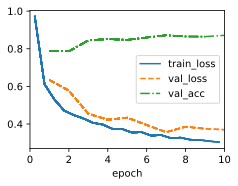

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.5.6. Discussion

### 8.5.7. Exercises

1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?

Answer :    

Ya, parameter bias biasanya dihapus sebelum batch normalization. Ini karena batch normalization melakukan sentralisasi data, yaitu, ia menghitung rata-rata dari setiap minibatch dan mengurangi rata-rata tersebut dari setiap input, sehingga bias secara efektif dihilangkan. Oleh karena itu, menambahkan bias sebelum batch normalization tidak memiliki efek yang berarti, karena akan segera dinormalkan. Menghapus bias membantu menghindari redundansi.

2. Compare the learning rates for LeNet with and without batch normalization.

2.1. Plot the increase in validation accuracy.

Answer :    

Grafik akurasi validasi seiring waktu harus menunjukkan bahwa model dengan batch normalization biasanya mengalami konvergensi lebih cepat dibandingkan model tanpa batch normalization. Dengan batch normalization, jaringan dapat menggunakan tingkat pembelajaran yang lebih tinggi karena nilai input setiap lapisan dinormalisasi, yang menstabilkan proses pelatihan.

2.2. How large can you make the learning rate before the optimization fails in both cases?

Answer :      

Pada umumnya, dengan batch normalization, model dapat mentoleransi learning rate yang lebih besar tanpa mengalami masalah konvergensi. Misalnya, learning rate di atas 0.1 mungkin mulai menyebabkan kegagalan konvergensi pada model tanpa batch normalization, sementara model dengan batch normalization dapat menangani learning rate yang lebih besar seperti 0.3 atau lebih tinggi.

3. Do we need batch normalization in every layer? Experiment with it.

Answer :    

Batch normalization tidak harus diterapkan di setiap lapisan. Misalnya, pada lapisan awal atau akhir dari jaringan, penerapannya mungkin tidak selalu meningkatkan kinerja, dan pada beberapa kasus bisa memperlambat pelatihan. Eksperimen dapat menunjukkan bahwa batch normalization paling efektif ketika diterapkan pada lapisan tengah di mana gradient mungkin menjadi tidak stabil.

4. Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?

Answer :    

* Menghilangkan hanya mean: Versi ini hanya menghilangkan rata-rata tetapi tidak melakukan rescaling untuk variansi. Ini bisa memperbaiki stabilitas numerik tanpa mengurangi variasi skala antar lapisan, namun hasilnya cenderung kurang stabil daripada batch normalization penuh karena skala masih dapat bervariasi di antara lapisan.

* Menghilangkan hanya varians: Dalam versi ini, kita menjaga rata-rata tetapi melakukan rescaling untuk variansi. Ini bisa membantu menjaga skala yang konsisten di antara lapisan tetapi bisa menyebabkan pergeseran rata-rata antar lapisan, yang dapat mempengaruhi proses pelatihan.

5. Fix the parameters beta and gamma. Observe and analyze the results.

Answer :    

Dengan memperbaiki parameter beta dan gamma, kita menghilangkan kemampuan model untuk mempelajari pergeseran (shift) dan skala (scale) yang optimal dari aktivasi. Hasilnya, kita dapat melihat bahwa model mungkin memiliki kinerja yang lebih buruk karena tidak dapat menyesuaikan diri dengan distribusi yang berubah selama pelatihan. Ini menunjukkan pentingnya parameter beta dan gamma dalam batch normalization.

6. Can you replace dropout by batch normalization? How does the behavior change?

Answer :    

Mengganti dropout dengan batch normalization dapat meningkatkan stabilitas pelatihan dan mempercepat konvergensi, tetapi perilakunya berbeda karena kedua teknik ini bekerja dengan cara yang berbeda:

* Dropout adalah teknik regularisasi yang secara acak mengabaikan beberapa neuron selama pelatihan untuk mengurangi overfitting.
* Batch normalization lebih berfokus pada stabilisasi dan percepatan pelatihan melalui normalisasi input pada setiap lapisan.

Dalam beberapa kasus, mengganti dropout dengan batch normalization bisa memberikan hasil yang lebih baik, terutama untuk model yang dalam, tetapi untuk model yang lebih kecil atau jika overfitting menjadi masalah utama, dropout mungkin tetap diperlukan.

7. Research ideas: think of other normalization transforms that you can apply:

7.1. Can you apply the probability integral transform?

Answer :    

Ini dapat digunakan untuk mengubah distribusi input menjadi distribusi seragam. Namun, dalam konteks deep learning, ini mungkin kurang umum digunakan dibandingkan normalisasi berbasis statistik sederhana.

7.2. Can you use a full-rank covariance estimate? Why should you probably not do that?

Answer :    

Menggunakan estimasi kovarians penuh mungkin tidak praktis karena komputasi yang sangat mahal, terutama pada data dengan dimensi tinggi.

7.3. Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?

Answer :       

Matriks kompak dapat menawarkan keuntungan dalam hal efisiensi komputasi dan penyimpanan, terutama pada model besar. Namun, tantangannya adalah menemukan matriks yang sesuai untuk struktur data tertentu.

7.4. Does a sparsification compression act as a regularizer?

Answer :    

Kompresi sparsifikasi dapat bertindak sebagai regularizer dengan mengurangi kompleksitas model, mirip dengan cara dropout atau L1 regularization bekerja.

7.5. Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?

Answer :    

Proyeksi semacam ini dapat diterapkan pada data yang memiliki sifat simetri khusus, seperti data visual yang simetris. Namun, kompleksitas penerapan proyeksi semacam itu sering kali lebih tinggi daripada normalisasi standar.

## 8.6. Residual Networks (ResNet) and ResNeXt

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.6.1. Function Classes

### 8.6.2. Residual Blocks

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

### 8.6.3. ResNet Model

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


### 8.6.4. Training

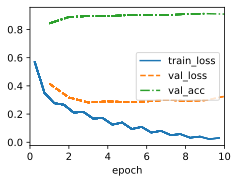

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

### 8.6.5. ResNeXt

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

### 8.6.6. Summary and Discussion

### 8.6.7. Exercises

1. What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?

Answer :    

* Inception block (seperti di Fig. 8.4.1) dirancang untuk memproses berbagai transformasi (dengan berbagai ukuran kernel, pooling, dsb.) secara paralel dan menggabungkannya di akhir. Ini memperkenalkan banyak variasi transformasi ke dalam jaringan, yang meningkatkan kemampuan jaringan untuk menangkap pola yang berbeda dalam data.
* Residual block (seperti di Fig. 8.6.2) lebih sederhana, fokus utamanya adalah mengatasi masalah vanishing gradients pada jaringan yang sangat dalam. Residual block menggabungkan identitas input ke dalam blok melalui skip connection atau shortcut. Hal ini memungkinkan informasi mengalir lebih mudah melalui lapisan-lapisan, dan dapat memudahkan pelatihan jaringan yang lebih dalam.
* Dalam hal komputasi, Inception block cenderung lebih berat dibandingkan residual block karena banyaknya transformasi yang dilakukan secara paralel. Akurasi ResNet terbukti sangat tinggi, dan residual block memungkinkan pelatihan jaringan yang lebih dalam tanpa kehilangan kinerja. Kelas fungsi yang digambarkan oleh residual block lebih terkendali karena transformasi diatur lebih sederhana dengan skip connection yang menggabungkan identitas.

2. Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.

Answer :    

ResNet memiliki berbagai varian berdasarkan jumlah lapisan yang digunakan, seperti ResNet-18, ResNet-34, ResNet-50, ResNet-101, dan ResNet-152. Implementasi dapat bervariasi dalam jumlah residual blocks di setiap modul. Berikut adalah contoh implementasi untuk ResNet-50:

In [ ]:
class ResNet50(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((3, 64), (4, 128), (6, 256), (3, 512)), lr, num_classes)

3. For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.

Answer :    

Bottleneck block mengurangi jumlah fitur saluran di lapisan tengah, lalu mengembalikan jumlah saluran ke tingkat yang lebih tinggi setelahnya. Ini dilakukan dengan menggunakan lapisan konvolusi $1 \times 1$ untuk mengurangi dan meningkatkan dimensi saluran:

In [ ]:
class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels, bottleneck_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, bottleneck_channels, kernel_size=1)
        self.conv2 = nn.Conv2d(bottleneck_channels, bottleneck_channels, kernel_size=3, padding=1, stride=strides)
        self.conv3 = nn.Conv2d(bottleneck_channels, out_channels, kernel_size=1)
        self.bn1 = nn.BatchNorm2d(bottleneck_channels)
        self.bn2 = nn.BatchNorm2d(bottleneck_channels)
        self.bn3 = nn.BatchNorm2d(out_channels)
        if use_1x1conv:
            self.conv4 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=strides)
            self.bn4 = nn.BatchNorm2d(out_channels)
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)


4. In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.

Answer :    

Anda dapat mengubah urutan ini dengan menukar urutan lapisan dalam blok residual seperti berikut:

In [ ]:
class ModifiedResidualBlock(nn.Module):
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.conv1 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=strides, padding=1)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(num_channels, num_channels, kernel_size=1, stride=strides)
            self.bn3 = nn.BatchNorm2d(num_channels)
        else:
            self.conv3 = None

    def forward(self, X):
        Y = F.relu(self.bn1(X))
        Y = self.conv1(Y)
        Y = F.relu(self.bn2(Y))
        Y = self.conv2(Y)
        if self.conv3:
            X = self.bn3(self.conv3(X))
        return F.relu(Y + X)

5. Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?

Answer :     

Meningkatkan kompleksitas fungsi tanpa batas dapat menyebabkan masalah seperti overfitting, di mana model menjadi terlalu spesifik terhadap data pelatihan dan tidak generalisasi dengan baik ke data baru. Meskipun kelas fungsi bertingkat (nested) memastikan peningkatan kapasitas, tetap ada batasan praktis, seperti sumber daya komputasi dan data yang terbatas. Fungsi yang terlalu kompleks juga dapat menyebabkan kesulitan dalam pelatihan, seperti masalah vanishing gradients dan eksplorasi ruang parameter yang lebih sulit.

## 8.7. Densely Connected Networks (DenseNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

### 8.7.1. From ResNet to DenseNet

### 8.7.2. Dense Blocks

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

### 8.7.3. Transition Layers

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

### 8.7.4. DenseNet Model

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

### 8.7.5. Training

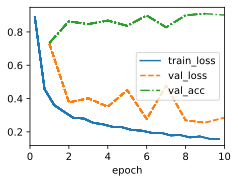

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

### 8.7.6. Summary and Discussion

### 8.7.7. Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?

Answer :     

Average pooling digunakan dalam transition layer untuk secara efektif mengurangi ukuran fitur (height dan width) sekaligus mempertahankan informasi dari semua piksel. Max-pooling cenderung mengambil nilai maksimum di antara piksel, yang dapat menyebabkan hilangnya informasi. Average pooling lebih lembut dalam menyusutkan dimensi dan cocok untuk DenseNet yang membutuhkan fitur sebelumnya untuk digabungkan dengan layer-layer berikutnya. Dengan average pooling, jaringan dapat lebih baik mempertahankan informasi yang dibutuhkan.

2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

Answer :      

DenseNet memiliki jumlah parameter yang lebih kecil dibandingkan ResNet karena alih-alih menghitung setiap output layer secara independen, DenseNet menggunakan kembali fitur dari semua layer sebelumnya melalui concatenation. Ini mengurangi kebutuhan untuk menghitung ulang fitur yang sama, sehingga mengurangi jumlah total parameter. Sementara ResNet menambahkan output layer sebelumnya ke layer berikutnya, yang memerlukan bobot tambahan untuk setiap operasi penjumlahan.

3. One problem for which DenseNet has been criticized is its high memory consumption.

3.1. Is this really the case? Try to change the input shape to 224 x 224
 to compare the actual GPU memory consumption empirically.

Answer :      

Ya, ini benar. DenseNet dapat memakan lebih banyak memori GPU dibandingkan jaringan lain seperti ResNet karena layer-layernya menggabungkan (concatenate) output dari setiap layer sebelumnya, yang berarti bahwa ukuran tensor yang dihasilkan di setiap layer bertambah seiring dengan semakin dalamnya jaringan. Dengan mengubah input menjadi 224x224, kita dapat melihat peningkatan konsumsi memori GPU dibandingkan input dengan ukuran yang lebih kecil. Anda dapat memverifikasi ini dengan mengukur penggunaan memori GPU selama pelatihan menggunakan profiler seperti torch.cuda.memory_allocated().

3.2. Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

Answer :     

Salah satu alternatif untuk mengurangi konsumsi memori adalah dengan menggunakan teknik seperti gradient checkpointing. Dalam pendekatan ini, beberapa tensor sementara yang digunakan selama forward pass tidak disimpan di memori. Alih-alih, tensor-tensor tersebut dihitung ulang selama backward pass, yang mengurangi penggunaan memori di GPU selama pelatihan. Ini bisa diterapkan pada framework dengan menambahkan torch.utils.checkpoint ke bagian DenseBlock yang memiliki banyak layer, atau Anda bisa memodifikasi DenseNet untuk lebih mengatur kapan dan bagaimana tensor disimpan.

4. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

Answer :     

Tabel 1 dalam makalah DenseNet (Huang et al., 2017) berisi beberapa arsitektur DenseNet dengan konfigurasi yang berbeda (DenseNet-121, DenseNet-169, DenseNet-201, dan DenseNet-264). Untuk mengimplementasikan versi ini, Anda perlu mengatur jumlah blok konvolusi dan growth rate sesuai dengan yang ditentukan di makalah tersebut. Misalnya, DenseNet-121 terdiri dari blok dengan 6, 12, 24, dan 16 lapisan konvolusi. Anda perlu memperbarui arsitektur DenseNet di kode untuk mencocokkan jumlah blok yang sesuai untuk versi yang ingin Anda implementasikan.

5. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

Answer :    

Untuk merancang model MLP berbasis DenseNet, Anda dapat mengganti layer konvolusi dengan layer fully connected (dense) dan menerapkan konsep concatenation antar-layer. Setiap layer dalam MLP akan menggabungkan input dari semua layer sebelumnya alih-alih hanya mengandalkan layer sebelumnya langsung. Setelah merancang MLP ini, Anda bisa mencoba menerapkannya pada dataset prediksi harga rumah (misalnya, dataset Ames Housing) dan melihat bagaimana concatenation antar-layer mempengaruhi performa prediksi dibandingkan dengan MLP tradisional.

## 8.8. Designing Convolution Network Architectures

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

### 8.8.1. The AnyNet Design Space

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

### 8.8.2. Distributions and Parameters of Design Spaces

### 8.8.3. RegNet

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


### 8.8.4. Training

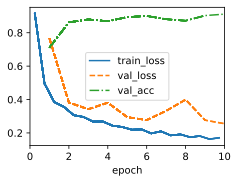

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

### 8.8.5. Discussion

### 8.8.6. Exercises

1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

Answer :    

Untuk menjawab pertanyaan ini, langkah-langkah yang perlu dilakukan adalah:

Meningkatkan jumlah stages dari dua atau tiga menjadi empat.
Setiap stage akan terdiri dari lebih banyak ResNeXt blocks.
Setelah menambah stage, jalankan eksperimen untuk melihat apakah kinerja model meningkat.
Contoh implementasi (menggunakan PyTorch):

In [ ]:
class RegNetXDeeper(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6, 8, 10), (32, 80, 160, 320)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul),
             (depths[2], channels[2], groups, bot_mul),
             (depths[3], channels[3], groups, bot_mul)),
            stem_channels, lr, num_classes)


Dengan konfigurasi ini, kita dapat menjalankan pelatihan model dan mengevaluasi apakah ada peningkatan kinerja pada dataset yang digunakan, misalnya Fashion-MNIST.

2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

Answer :    

Untuk melakukan hal ini, kita perlu mengganti blok ResNeXt dengan blok ResNet yang lebih tradisional. Ini dapat dilakukan dengan memodifikasi arsitektur RegNet yang digunakan.

Contoh implementasi:

In [ ]:
@d2l.add_to_class(AnyNet)
def stage_resnet(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNetBlock(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNetBlock(num_channels))
    return nn.Sequential(*blk)


3. Implement multiple instances of a “VioNet” family by violating the design principles of RegNetX. How do they perform? Which of (di, ci, gi, bi) is the most important factor? is the most important factor?

Answer :     

Di sini, kita diminta untuk melanggar prinsip-prinsip desain RegNetX dan membuat keluarga baru jaringan yang disebut "VioNet". Misalnya, kita dapat:

* Tidak mengikuti aturan peningkatan jumlah channels dan depth pada setiap stage.
* Mengubah group width, depth, bottleneck ratio secara acak.

Contoh implementasi:

In [ ]:
class VioNet(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 8, 2
        depths, channels = (10, 4, 8, 2), (64, 128, 256, 512)  # Tidak mengikuti prinsip RegNet
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul),
             (depths[2], channels[2], groups, bot_mul),
             (depths[3], channels[3], groups, bot_mul)),
            stem_channels, lr, num_classes)


Hasilnya dapat dibandingkan dengan RegNetX, dan kita dapat mengevaluasi apakah depth (di), channels (ci), groups (gi), atau bottleneck ratio (bi) yang paling berpengaruh pada kinerja.

4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

Answer :     

Untuk merancang MLP yang optimal, kita dapat memanfaatkan prinsip-prinsip yang telah diperkenalkan dalam RegNet, seperti memilih ukuran layer yang bertambah secara linier dan jumlah neuron yang meningkat seiring dengan kedalaman jaringan.

Contoh implementasi dasar:

In [ ]:
class PerfectMLP(nn.Module):
    def __init__(self, input_size, num_classes, layer_sizes=[256, 512, 1024]):
        super(PerfectMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, layer_sizes[0]),
            nn.ReLU(),
            nn.Linear(layer_sizes[0], layer_sizes[1]),
            nn.ReLU(),
            nn.Linear(layer_sizes[1], layer_sizes[2]),
            nn.ReLU(),
            nn.Linear(layer_sizes[2], num_classes)
        )

    def forward(self, x):
        return self.model(x)


Arsitektur ini menggunakan prinsip bertambahnya ukuran layer seiring bertambahnya depth, dan performanya dapat diuji pada dataset besar maupun kecil untuk melihat apakah prinsip yang sama berlaku saat skala jaringan meningkat.